In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df_clean = df.drop_duplicates().copy()
df_clean = df_clean.drop_duplicates(subset=['job_title','company_name','job_country'])
df_clean['job_skills'] = df_clean['job_skills'].apply(lambda skills:ast.literal_eval(skills)if pd.notna(skills)else skills)

<Axes: ylabel='count'>

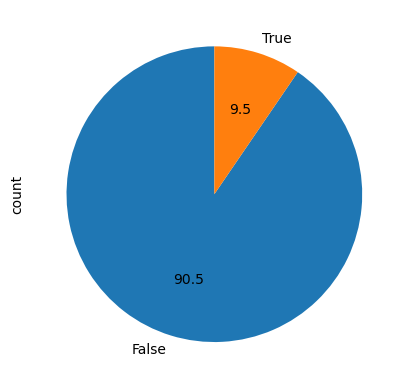

In [10]:
df_clean['job_work_from_home'].value_counts().plot(kind='pie',startangle=90, autopct='%1.1f')

Text(0, 0.5, '')

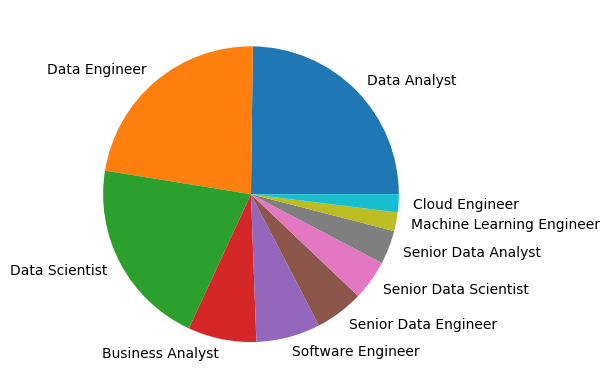

In [5]:
df_clean['job_title_short'].value_counts().plot(kind='pie')
plt.ylabel('')

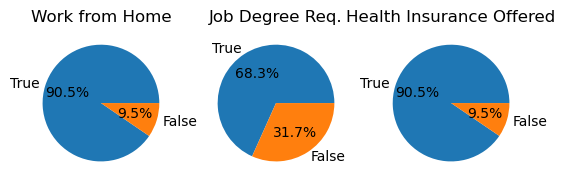

In [22]:
fig, ax = plt.subplots(1,3)

dict_columns = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i,(column, title) in enumerate(dict_columns.items()):
    # print(i, column, title)
    ax[i].pie(df_clean[column].value_counts(), autopct='%1.1f%%',labels=['True','False'])
    ax[i].set_title(title)
plt.show()